<a href="https://colab.research.google.com/github/riccricc91/CNN/blob/master/Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
  print(tf.__version__)
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
#Import the library
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (Input, Activation, Dense, Flatten, Conv2D, 
                                     MaxPooling2D, Dropout, BatchNormalization)
import numpy as np
import numpy as np
from google.colab import files
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
#Upload the dataset from GoogleDrive
#The sataset is available in https://www.kaggle.com/rajmehra03/flower-recognition-cnn-keras
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Define the directory from GoogleDrive for the dataset

directory_dataset = '/content/drive/My Drive/dataset/flowers'

daisy_dir     = os.path.join('/content/drive/My Drive/dataset/flowers/daisy')
dandelion_dir = os.path.join('/content/drive/My Drive/dataset/flowers/dandelion')

rose_dir      = os.path.join('/content/drive/My Drive/dataset/flowers/rose')
tulip_dir     = os.path.join('/content/drive/My Drive/dataset/flowers/tulip')
sunflower_dir = os.path.join('/content/drive/My Drive/dataset/flowers/sunflower')

In [0]:
dandelion_dir_name = os.listdir(dandelion_dir)
print(dandelion_dir_name[:10])
print('total training dandelion images:', len(os.listdir(dandelion_dir)))

daisy_dir_names = os.listdir(daisy_dir)
print(daisy_dir_names[:10])
print('total training daisy images:', len(os.listdir(daisy_dir)))

rose_dir_names = os.listdir(rose_dir)
print(rose_dir_names[:10])
print('total training rose images:', len(os.listdir(rose_dir)))

tulip_dir_names = os.listdir(tulip_dir)
print(tulip_dir_names[:10])
print('total training tulip images:', len(os.listdir(tulip_dir)))

sunflower_dir_names = os.listdir(sunflower_dir)
print(sunflower_dir_names[:10])
print('total training sunflower images:', len(os.listdir(sunflower_dir)))

['4562516418_8ccb8c103f.jpg', 'flickr.py', '17075803866_aeeded2637.jpg', '5605502523_05acb00ae7_n.jpg', '3419166382_a5e4b8fe6d_m.jpg', '2457473644_5242844e52_m.jpg', '34571238031_7eff74ca43_n.jpg', '7291185504_b740bbeba4_m.jpg', '5628296138_9031791fab.jpg', '34578947551_863af3acb3_n.jpg']
total training dandelion images: 1046
['5512287917_9f5d3f0f98_n.jpg', '476857510_d2b30175de_n.jpg', '14167534527_781ceb1b7a_n.jpg', '521762040_f26f2e08dd.jpg', '34638378196_216d5bbc2e_n.jpg', '7320089276_87b544e341.jpg', '33837577463_1ae52a3726_n.jpg', '34718882165_68cdc9def9_n.jpg', '8008258043_5457dd254b_n.jpg', '8719756744_34a5a83976_n.jpg']
total training daisy images: 762
['4860145119_b1c3cbaa4e_n.jpg', '16209331331_343c899d38.jpg', '5777669976_a205f61e5b.jpg', '18302701228_2b5790b199_n.jpg', '5001848317_b33d17ab7a_n.jpg', '15011625580_7974c44bce.jpg', '8983268106_dc913d17d8_m.jpg', '17953368844_be3d18cf30_m.jpg', '14267691818_301aceda07.jpg', '5001846495_56068de2da_n.jpg']
total training rose im

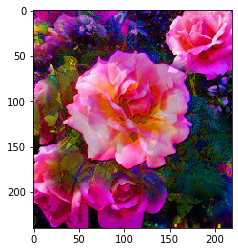

In [0]:
#Show the dataset (rose image)
img_path = os.path.join(rose_dir, rose_dir_names[10]) 
img = mpimg.imread(img_path)
plt.imshow(img)

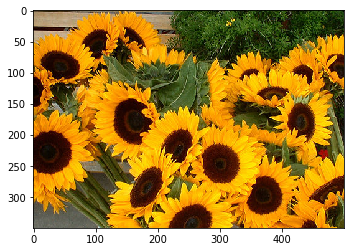

In [0]:
#Show the dataset (rose image)
img_path = os.path.join(sunflower_dir, sunflower_dir_names[10]) 
img = mpimg.imread(img_path)
plt.imshow(img)

In [0]:
#Define the CNN model

class model (tf.keras.Model):
    
    def __init__(self):
       
        super(model, self).__init__()
        
        self.conv_1 = Conv2D(16, kernel_size=(3, 3), activation='relu',input_shape=(300, 300, 3)) 
        self.max_pool_1 = MaxPooling2D(pool_size=(2, 2))
        self.conv_2 = Conv2D(32, kernel_size=(3, 3), activation='relu') 
        self.max_pool_2 = MaxPooling2D(pool_size=(2, 2))
        self.conv_3 = Conv2D(64, kernel_size=(3, 3), activation='relu') 
        self.max_pool_3 = MaxPooling2D(pool_size=(2, 2)) 
        self.conv_4 = Conv2D(64, kernel_size=(3, 3), activation='relu') 
        self.max_pool_4 = MaxPooling2D(pool_size=(2, 2)) 

        self.conv_5 = Conv2D(128, kernel_size=(3, 3), activation='relu') 
        self.max_pool_5 = MaxPooling2D(pool_size=(2, 2)) 
  
        self.flatten = tf.keras.layers.Flatten()
        self.dropout = tf.keras.layers.Dropout(0.2)

        self.dense_1 = tf.keras.layers.Dense(units=512, activation='relu')
 
        self.dense_2 = tf.keras.layers.Dense(units=128, activation='relu')
        self.dense_3 = tf.keras.layers.Dense(units=5, activation='softmax')
        
    def call(self, inputs):

        x = self.max_pool_1(self.conv_1(inputs))
        x = self.max_pool_2(self.conv_2(x))
        x = self.max_pool_3(self.conv_3(x))
        x = self.max_pool_4(self.conv_4(x))
        x = self.max_pool_5(self.conv_5(x))
                
        x = self.flatten(x)
        x = self.dropout(x)
        x = self.dense_1(x)     
        x = self.dense_2(x)
        x = self.dense_3(x)
        
        return x

In [0]:
model = model()

In [0]:
#Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
#Preprocessing and rescale
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(rescale=1/255)
#test_datagen = ImageDataGenerator(rescale=1/255)

train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(directory_dataset, target_size=(300, 300), batch_size=128,  class_mode='categorical')

Found 4276 images belonging to 5 classes.


In [0]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [0]:
#Train the model
history = model.fit_generator(
      train_generator,
   #   steps_per_epoch=8,  
      epochs=20,
      verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Train for 34 steps
Epoch 1/20
34/34 [==============================] - 1668s 49s/step - loss: 1.8446 - accuracy: 0.2825
Epoch 2/20
34/34 [==============================] - 454s 13s/step - loss: 1.4604 - accuracy: 0.3590
Epoch 3/20
34/34 [==============================] - 455s 13s/step - loss: 1.2792 - accuracy: 0.4640
Epoch 4/20
34/34 [==============================] - 452s 13s/step - loss: 1.2083 - accuracy: 0.4970
Epoch 5/20
34/34 [==============================] - 453s 13s/step - loss: 1.1557 - accuracy: 0.5332
Epoch 6/20
34/34 [==============================] - 449s 13s/step - loss: 1.0624 - accuracy: 0.5718
Epoch 7/20
34/34 [==============================] - 449s 13s/step - loss: 1.0592 - accuracy: 0.5772
Epoch 8/20
34/34 [==============================] - 448s 13s/step - loss: 1.0063 - accuracy: 0.6055
Epoch 9/20
34/34 [==============================] - 451s 13s/step - loss: 0.9619 - accuracy: 0.6221
Epoc

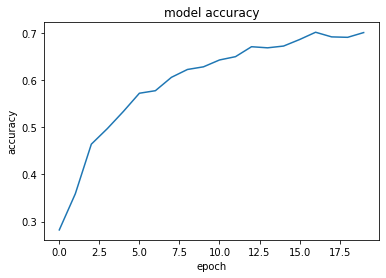

In [0]:
#Plot the accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

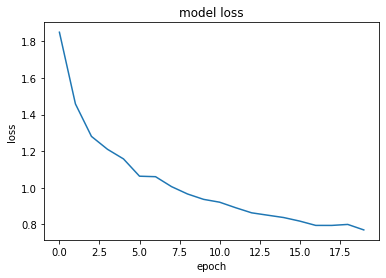

In [0]:
#Plot the loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [0]:
#Upload a new image
uploaded = files.upload()

Saving r.jpeg to r.jpeg


In [0]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [0]:
# predicting images
for i in uploaded.keys():
  path = '/content/' + i
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  print(classes[0])


[0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 1.684917e-24]
